# SUBJECT = FIND OUT THE HOT ZONE OF TERRORISM

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\Nishant\Documents\kundan borse\Lets grow more internship\EDA on Terrorism\Terrorism.csv", encoding='latin')

In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.shape

(181691, 135)

In [5]:
df.info(verbose='none')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Dtype  
---   ------              -----  
 0    eventid             int64  
 1    iyear               int64  
 2    imonth              int64  
 3    iday                int64  
 4    approxdate          object 
 5    extended            int64  
 6    resolution          object 
 7    country             int64  
 8    country_txt         object 
 9    region              int64  
 10   region_txt          object 
 11   provstate           object 
 12   city                object 
 13   latitude            float64
 14   longitude           float64
 15   specificity         float64
 16   vicinity            int64  
 17   location            object 
 18   summary             object 
 19   crit1               int64  
 20   crit2               int64  
 21   crit3               int64  
 22   doubtterr           float64
 23   alternative         float64
 24 

In [6]:
df.isnull().sum().head(20)

eventid             0
iyear               0
imonth              0
iday                0
approxdate     172452
extended            0
resolution     179471
country             0
country_txt         0
region              0
region_txt          0
provstate         421
city              434
latitude         4556
longitude        4557
specificity         6
vicinity            0
location       126196
summary         66129
crit1               0
dtype: int64

# Removing irrelaavnt attributes and that have more than 40% null values

In [7]:
df.drop('approxdate',axis=1,inplace=True)
df.drop('related',axis=1,inplace=True)
df.drop('eventid',axis=1,inplace=True)
df.drop('scite1',axis=1,inplace=True)
df.drop('scite2',axis=1,inplace=True)
df.drop('scite3',axis=1,inplace=True)
df.drop('resolution',axis=1,inplace=True)
df.drop('addnotes',axis=1,inplace=True)
df.drop('latitude',axis=1,inplace=True)
#df.drop('longitude',axis=1,inplace=True)
df.drop('summary',axis=1,inplace=True)
df.drop('longitude',axis=1,inplace=True)
df.drop('specificity',axis=1,inplace=True)
df.drop('vicinity',axis=1,inplace=True)
df.drop('extended',axis=1,inplace=True)
df.drop('doubtterr',axis=1,inplace=True)
df.drop('INT_LOG',axis=1,inplace=True)
df.drop('INT_IDEO',axis=1,inplace=True)
df.drop('INT_MISC',axis=1,inplace=True)
df.drop('INT_ANY',axis=1,inplace=True)
df.drop('ransomamt',axis=1,inplace=True)
df.drop('ransomamtus',axis=1,inplace=True)
df.drop('ransompaid',axis=1,inplace=True)
df.drop('ransompaidus',axis=1,inplace=True)
df.drop('ransomnote',axis=1,inplace=True)
df.drop('hostkidoutcome',axis=1,inplace=True)

In [8]:
df.head()

,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,location,...,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,hostkidoutcome_txt,nreleased,dbsource
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,PGIS
1,1970,0,0,130,Mexico,1,North America,Federal,Mexico city,NaN,...,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,NaN,NaN,PGIS
2,1970,1,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,PGIS
3,1970,1,0,78,Greece,8,Western Europe,Attica,Athens,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,PGIS
4,1970,1,0,101,Japan,4,East Asia,Fukouka,Fukouka,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,PGIS


In [9]:
round((df.isnull().sum() / len(df))*100,2)

iyear                  0.00
imonth                 0.00
iday                   0.00
country                0.00
country_txt            0.00
                      ...  
kidhijcountry         98.18
ransom                57.41
hostkidoutcome_txt    93.95
nreleased             94.28
dbsource               0.00
Length: 110, dtype: float64

In [10]:
df.drop('kidhijcountry',axis=1,inplace=True)
df.drop('ransom',axis=1,inplace=True)
df.drop('hostkidoutcome_txt',axis=1,inplace=True)
df.drop('nreleased',axis=1,inplace=True)
df.drop('nhostkidus',axis=1,inplace=True)
df.drop('nhours',axis=1,inplace=True)
df.drop('ndays',axis=1,inplace=True)
df.drop('propvalue',axis=1,inplace=True)
df.drop('propcomment',axis=1,inplace=True)
df.drop('nhostkid',axis=1,inplace=True)
df.drop('propextent',axis=1,inplace=True)
df.drop('propextent_txt',axis=1,inplace=True)
df.drop('divert',axis=1,inplace=True)
df.drop('nwoundus',axis=1,inplace=True)
df.drop('nwoundte',axis=1,inplace=True)
df.drop('nkillter',axis=1,inplace=True)
df.drop('nwound',axis=1,inplace=True)
df.drop('ishostkid',axis=1,inplace=True)
df.drop('weapdetail',axis=1,inplace=True)
df.drop('nkillus',axis=1,inplace=True)
df.drop('nkill',axis=1,inplace=True)
df.drop('weaptype4_txt',axis=1,inplace=True)
df.drop('weapsubtype4',axis=1,inplace=True)
df.drop('weapsubtype4_txt',axis=1,inplace=True)
df.drop('weapsubtype3',axis=1,inplace=True)
df.drop('weapsubtype3_txt',axis=1,inplace=True)
df.drop('weaptype4',axis=1,inplace=True)
df.drop('weapsubtype2_txt',axis=1,inplace=True)
df.drop('weaptype3',axis=1,inplace=True)
df.drop('weaptype3_txt',axis=1,inplace=True)
df.drop('weaptype2',axis=1,inplace=True)
df.drop('weaptype2_txt',axis=1,inplace=True)
df.drop('weapsubtype2',axis=1,inplace=True)
df.drop('weapsubtype1',axis=1,inplace=True)
df.drop('weapsubtype1_txt',axis=1,inplace=True)
df.drop('compclaim',axis=1,inplace=True)
df.drop('claimmode3_txt',axis=1,inplace=True)
df.drop('claimmode3',axis=1,inplace=True)
df.drop('claim3',axis=1,inplace=True)
df.drop('claimmode2_txt',axis=1,inplace=True)
df.drop('claimmode2',axis=1,inplace=True)
df.drop('claim2',axis=1,inplace=True)
df.drop('claimmode_txt',axis=1,inplace=True)
df.drop('claimmode',axis=1,inplace=True)
df.drop('claimed',axis=1,inplace=True)
df.drop('nperpcap',axis=1,inplace=True)
df.drop('nperps',axis=1,inplace=True)
df.drop('gsubname3',axis=1,inplace=True)
df.drop('guncertain1',axis=1,inplace=True)
df.drop('guncertain2',axis=1,inplace=True)
df.drop('guncertain3',axis=1,inplace=True)
df.drop('gsubname',axis=1,inplace=True)
df.drop('gname2',axis=1,inplace=True)
df.drop('gsubname2',axis=1,inplace=True)
df.drop('alternative',axis=1,inplace=True)
df.drop('natlty3_txt',axis=1,inplace=True)          
df.drop('natlty3',axis=1,inplace=True)
df.drop('target3',axis=1,inplace=True)
df.drop('corp3',axis=1,inplace=True)
df.drop('targsubtype3_txt',axis=1,inplace=True)
df.drop('targsubtype3',axis=1,inplace=True)
df.drop('targtype3_txt',axis=1,inplace=True)
df.drop('targtype3',axis=1,inplace=True)
df.drop('natlty2',axis=1,inplace=True)
df.drop('natlty2_txt',axis=1,inplace=True)
df.drop('targtype2',axis=1,inplace=True)
df.drop('targtype2_txt',axis=1,inplace=True)
df.drop('targsubtype2',axis=1,inplace=True)
df.drop('targsubtype2_txt',axis=1,inplace=True)
df.drop('corp2',axis=1,inplace=True)
df.drop('target2',axis=1,inplace=True)
df.drop('gname3',axis=1,inplace=True)
df.drop('attacktype2',axis=1,inplace=True)
df.drop('attacktype2_txt',axis=1,inplace=True)
df.drop('attacktype3',axis=1,inplace=True)
df.drop('attacktype3_txt',axis=1,inplace=True)
df.drop('alternative_txt',axis=1,inplace=True)
df.drop('motive',axis=1,inplace=True)
df.drop('region',axis=1,inplace=True)
df.drop('crit1',axis=1,inplace=True)
df.drop('crit2',axis=1,inplace=True)
df.drop('crit3',axis=1,inplace=True)
df.drop('multiple',axis=1,inplace=True)
df.drop('success',axis=1,inplace=True)
df.drop('natlty1',axis=1,inplace=True)
df.drop('gname',axis=1,inplace=True)
df.drop('individual',axis=1,inplace=True)
df.drop('weaptype1',axis=1,inplace=True)
df.drop('targtype1',axis=1,inplace=True)
df.drop('targsubtype1',axis=1,inplace=True)
df.drop('property',axis=1,inplace=True)
df.drop('dbsource',axis=1,inplace=True)
df.drop('country',axis=1,inplace=True)
df.drop('iday',axis=1,inplace=True)
df.drop('weaptype1_txt',axis=1,inplace=True)               
df.drop('attacktype1',axis=1,inplace=True)
df.drop('corp1',axis=1,inplace=True)
df.drop('suicide',axis=1,inplace=True)
df.drop('targsubtype1_txt',axis=1,inplace=True)
df.drop('natlty1_txt',axis=1,inplace=True)
df.drop('target1',axis=1,inplace=True)

In [11]:
round((df.isnull().sum() / len(df))*100,2)

iyear               0.00
imonth              0.00
country_txt         0.00
region_txt          0.00
provstate           0.23
city                0.24
location           69.46
attacktype1_txt     0.00
targtype1_txt       0.00
dtype: float64

In [12]:
df['location'].unique()

array([nan, 'Edes Substation', 'Caparra Shopping Center', ...,
       'The incident occurred near the town of Balcad.',
       'The incident occurred at the Humaymim Airport.',
       'The incident occurred in the Datu Hoffer district.'], dtype=object)

In [13]:
df['location'] = df['location'].replace('The incident occurred in the Datu Hoffer district.', 'Datu Hoffer')
df['location'] = df['location'].replace('The incident occurred near the town of Balcad.', 'Balcad')
df['location'] = df['location'].replace('The incident occurred at the Humaymim Airport.', 'Humaymin Airport')
df['location'] = df['location'].replace('The attack took place in Baghdad, Baghdad, Iraq.', 'Baghdad,Iraq')

In [14]:
df.head(5)

,iyear,imonth,country_txt,region_txt,provstate,city,location,attacktype1_txt,targtype1_txt
0,1970,7,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,NaN,Assassination,Private Citizens & Property
1,1970,0,Mexico,North America,Federal,Mexico city,NaN,Hostage Taking (Kidnapping),Government (Diplomatic)
2,1970,1,Philippines,Southeast Asia,Tarlac,Unknown,NaN,Assassination,Journalists & Media
3,1970,1,Greece,Western Europe,Attica,Athens,NaN,Bombing/Explosion,Government (Diplomatic)
4,1970,1,Japan,East Asia,Fukouka,Fukouka,NaN,Facility/Infrastructure Attack,Government (Diplomatic)


In [15]:
df.shape

(181691, 9)

In [16]:
df.isnull().sum()

iyear                   0
imonth                  0
country_txt             0
region_txt              0
provstate             421
city                  434
location           126196
attacktype1_txt         0
targtype1_txt           0
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df

,iyear,imonth,country_txt,region_txt,provstate,city,location,attacktype1_txt,targtype1_txt
7,1970,1,United States,North America,California,Oakland,Edes Substation,Bombing/Explosion,Utilities
14,1970,1,United States,North America,Puerto Rico,Rio Piedras,Caparra Shopping Center,Facility/Infrastructure Attack,Business
17,1970,1,United States,North America,New York,New York City,Brooklyn,Bombing/Explosion,Educational Institution
20,1970,1,United States,North America,Illinois,Champaign,Champaign Police Department,Facility/Infrastructure Attack,Police
22,1970,1,United States,North America,Washington,Seattle,Seattle University,Bombing/Explosion,Educational Institution
...,...,...,...,...,...,...,...,...,...
181684,2017,12,India,South Asia,Assam,Hungrum,The incident occurred in the Dima Hasao distri...,Hostage Taking (Kidnapping),Government (General)
181686,2017,12,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,Balcad,Armed Assault,Military
181687,2017,12,Syria,Middle East & North Africa,Lattakia,Jableh,Humaymin Airport,Bombing/Explosion,Military
181688,2017,12,Philippines,Southeast Asia,Maguindanao,Kubentog,Datu Hoffer,Facility/Infrastructure Attack,Private Citizens & Property


In [19]:
df.columns = ['Year','Month','Country','Region','State','City','Location','Attack_Type','Target']

In [20]:
df.head()

,Year,Month,Country,Region,State,City,Location,Attack_Type,Target
7,1970,1,United States,North America,California,Oakland,Edes Substation,Bombing/Explosion,Utilities
14,1970,1,United States,North America,Puerto Rico,Rio Piedras,Caparra Shopping Center,Facility/Infrastructure Attack,Business
17,1970,1,United States,North America,New York,New York City,Brooklyn,Bombing/Explosion,Educational Institution
20,1970,1,United States,North America,Illinois,Champaign,Champaign Police Department,Facility/Infrastructure Attack,Police
22,1970,1,United States,North America,Washington,Seattle,Seattle University,Bombing/Explosion,Educational Institution


# Now we will analyse every single attribute to find insight where crime happened most

year

<AxesSubplot:>

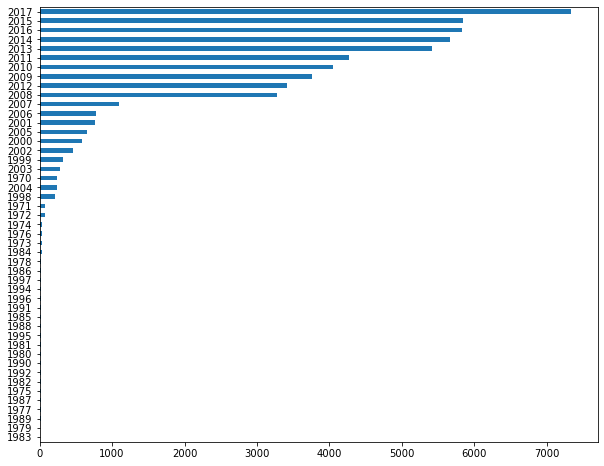

In [21]:
year = df['Year'].value_counts()
year = year[:50]
year = year.sort_values(ascending=True)
plt.figure(figsize=(10,8))
year.plot(kind='barh')

As we can see there is pattern in the crime means from year 2008 to 2017 Terrorism increases

<AxesSubplot:ylabel='Country'>

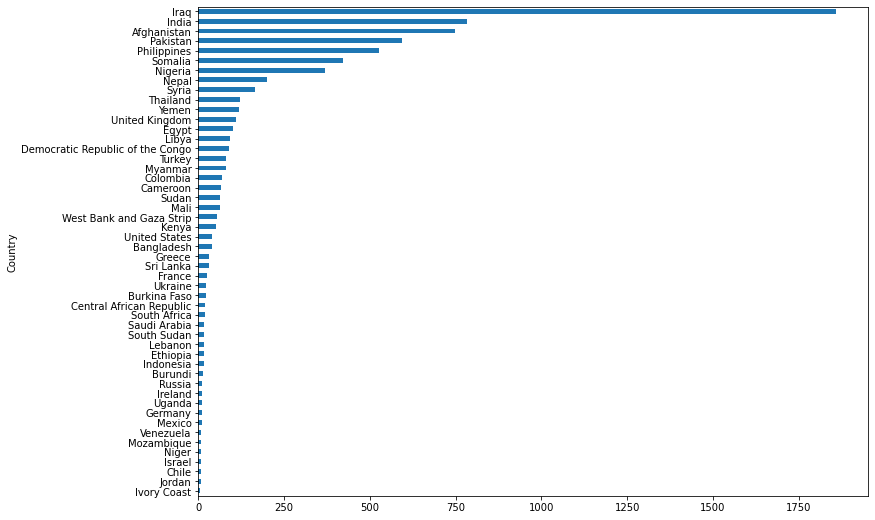

In [22]:
df_2017 = df[df['Year'] == 2017]
country_year_2017 = df_2017.groupby('Country')['Year'].count().sort_values(ascending=False)
country_year_2017 = country_year_2017[:50]
country_year_2017 = country_year_2017.sort_values(ascending=True)
plt.figure(figsize=(12,9))
country_year_2017.plot(kind='barh')

As from previous graph where most Terrorism happened in 2017 so in 2017 iraq is the hot zone for terrorism followed by india,afganishtan and pakistan

<AxesSubplot:ylabel='Country'>

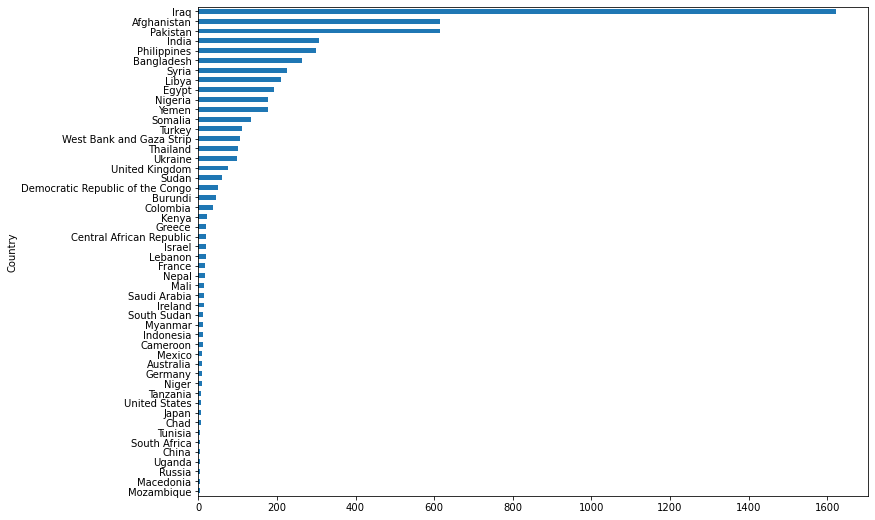

In [23]:
df_2015 = df[df['Year'] == 2015]
country_year_2015 = df_2015.groupby('Country')['Year'].count().sort_values(ascending=False)
country_year_2015 = country_year_2015[:50]
country_year_2015 = country_year_2015.sort_values(ascending=True)
plt.figure(figsize=(12,9))
country_year_2015.plot(kind='barh')

As from previous graph where second most Terrorism happened in 2015 so in 2015 iraq is the hot zone for terrorism followed by afganishtan,pakistan,india

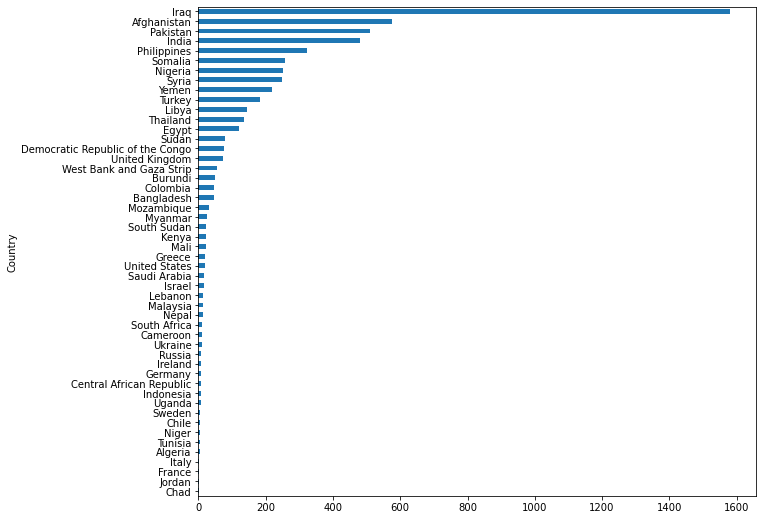

In [24]:
df_2016 = df[df['Year'] == 2016]
country_year_2016 = df_2016.groupby('Country')['Year'].count().sort_values(ascending=False)
country_year_2016 = country_year_2016[:50]
country_year_2016 = country_year_2016.sort_values(ascending=True)
plt.figure(figsize=(10,9))
country_year_2016.plot(kind='barh')
plt.show()

As from previous graph where second most Terrorism happened in 2016 so in 2016 iraq is the hot zone for terrorism followed by afganishtan,pakistan,india

<AxesSubplot:>

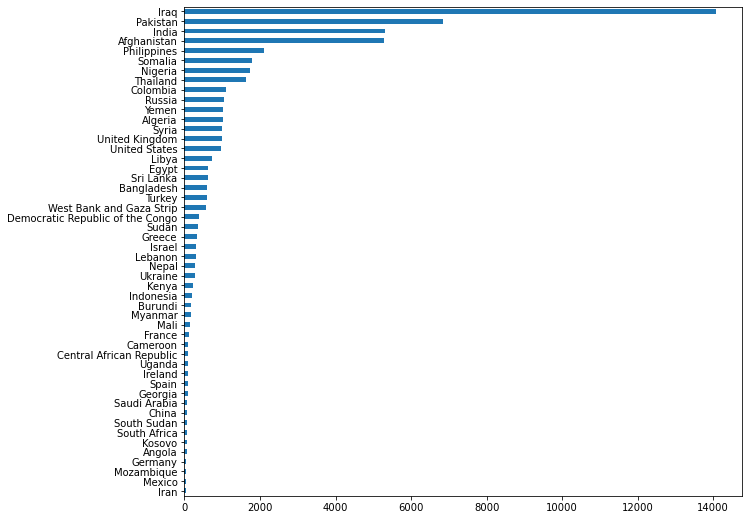

In [25]:
Country = df['Country'].value_counts()
Country = Country[:50]
Country = Country.sort_values(ascending=True)
plt.figure(figsize=(10,9))
Country.plot(kind='barh')

Including All Year we can conclude that Irag has most Terrorism rate

<AxesSubplot:>

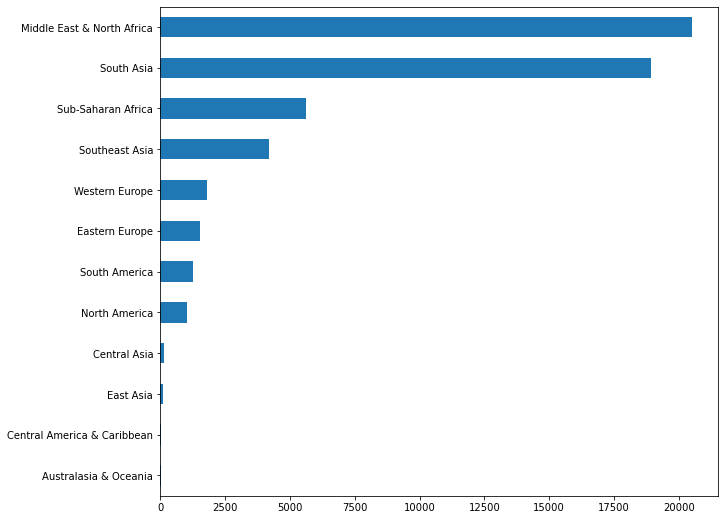

In [26]:
Region = df['Region'].value_counts()
Region = Region[:50]
Region = Region.sort_values(ascending=True)
plt.figure(figsize=(10,9))
Region.plot(kind='barh')

Middle East & North Africa Region and South Asia has More Terrorism 

<AxesSubplot:>

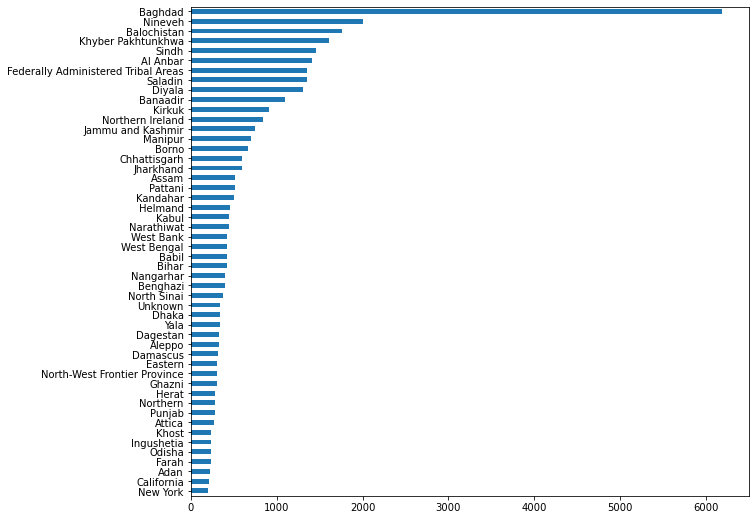

In [27]:
State = df['State'].value_counts()
State = State[:50]
State = State.sort_values(ascending=True)
plt.figure(figsize=(10,9))
State.plot(kind='barh')

As from this chart we can see State Baghdad has most Terrorism followed by Nineveh and Balochistan

<AxesSubplot:>

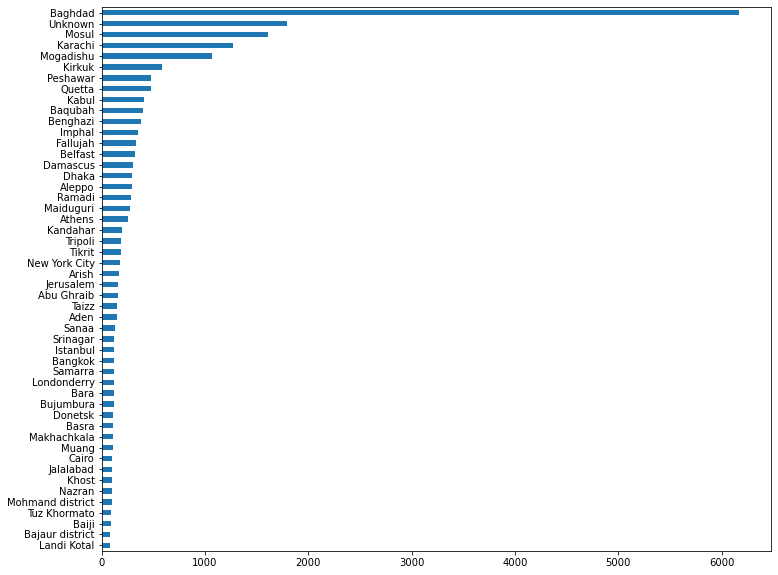

In [28]:
City = df['City'].value_counts()
City = City[:50]
City = City.sort_values(ascending=True)
plt.figure(figsize=(12,10))
City.plot(kind='barh')

As from this chart we can see City Baghdad has most Terrorism followed by Nineveh and Balochistan

<AxesSubplot:ylabel='State'>

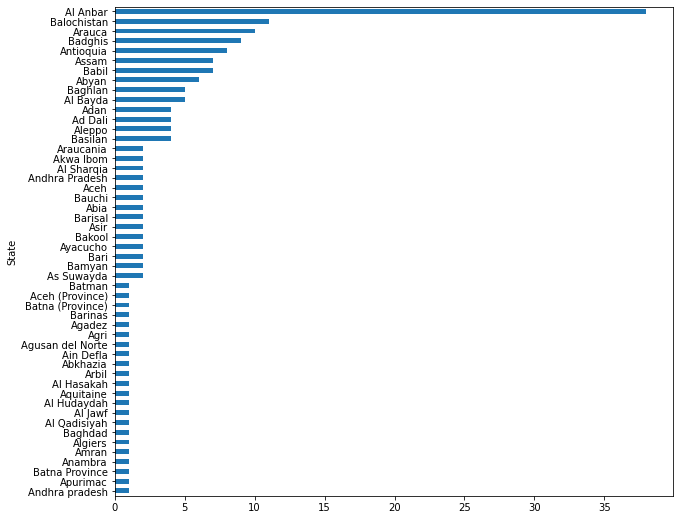

In [40]:
unknown = df[df['City'] == 'Unknown']
unknown_cities_by_state = unknown.groupby('State').size()
unknown_cities_by_state = unknown_cities_by_state[:50]
unknown_cities_by_state = unknown_cities_by_state.sort_values(ascending=True)
plt.figure(figsize=(10,9))
unknown_cities_by_state.plot(kind='barh')

As we have Unknown cities and to find unknown cities we found some states groupby States so we can easily see unknown cities 
are from Al Anbar,Balochistan,Arauca,Badghis,Antioquia and so on

<AxesSubplot:>

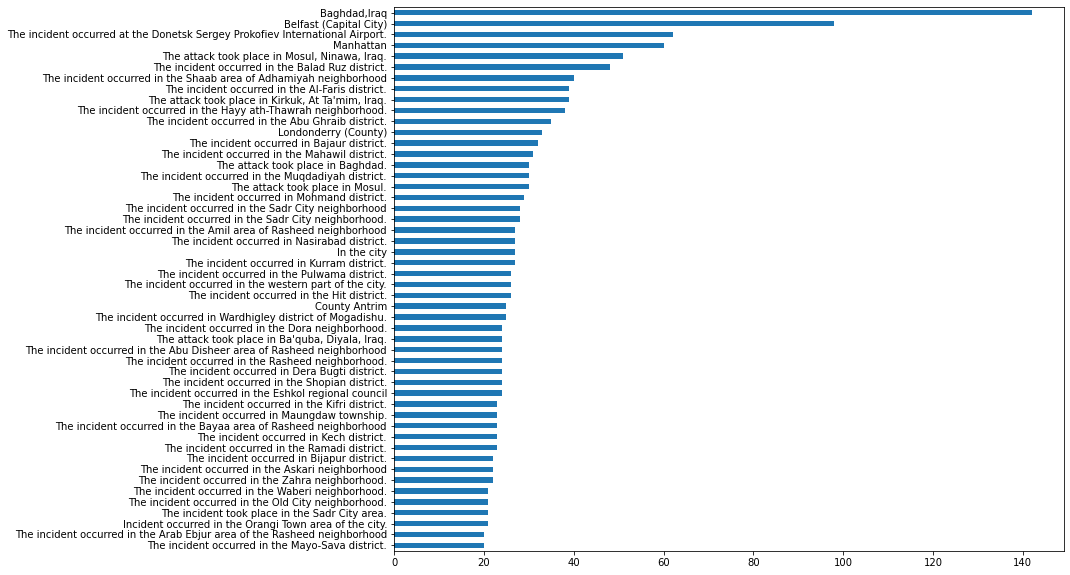

In [30]:
location = df['Location'].value_counts()
location = location[:50]
location = location.sort_values(ascending=True)
plt.figure(figsize=(12,10))
location.plot(kind='barh')

As from the location Baghdad,Belfast,Donetsk Sergey International Airport,Manhatten,Mosul Ninava Iraq and so on

<AxesSubplot:>

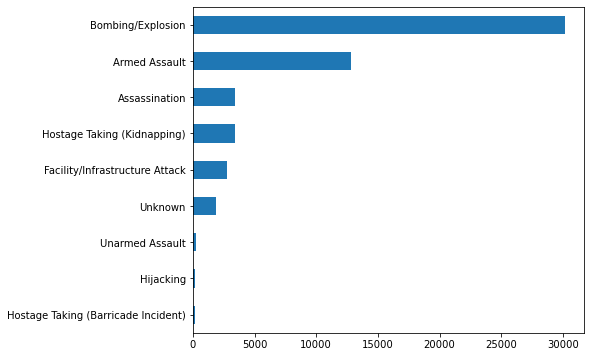

In [42]:
Attack_Type = df['Attack_Type'].value_counts()
Attack_Type = Attack_Type[:50]
Attack_Type = Attack_Type.sort_values(ascending=True)
plt.figure(figsize=(7,6))
Attack_Type.plot(kind='barh')

Bombing or Explosion is the first choice of Terrorist for Terrorism and then Armed Assault

<AxesSubplot:>

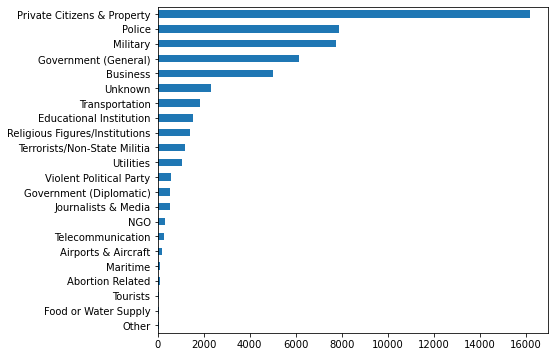

In [43]:
target = df['Target'].value_counts()
target = target[:50]
target = target.sort_values(ascending=True)
plt.figure(figsize=(7,6))
target.plot(kind='barh')

Terrorist 1rst target is Citizens & Property and Police, Militry and so on

# From all these above insights we can say that Baghdad,Iraq is the hottest Zone for terrorist to Target

# Iraq, Afganistan, Pakistan and India are the favourite zones of Terrorists